Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [2]:
import os
import zipfile
from shutil import copyfile
import numpy as np
import random
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tensorflow as tf
from google.colab import files
import glob
import pandas as pd
from keras import models
from keras import layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
local_zip = "/content/drive/MyDrive/Colab Notebooks/archive.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/archive")
zip_ref.close()

In [16]:
def convert_image(source, label):
  fname = os.listdir(source)
  images= None
  
  for i,value in enumerate(fname):
    source_path = os.path.join(source, fname[i])
    if os.path.getsize(source_path)==0:
      print("file has zero size")
    else:
      img=image.load_img(source_path, target_size=(200, 200)) # Load image
      x=image.img_to_array(img)                               # Image ot array
      x=tf.image.rgb_to_grayscale(x)                          # gray scale conversion
      x=np.expand_dims(x, axis=0)
      if images is None:
        images = x
      else:
        images = np.vstack((images, x))
  print(images.shape)
  images=images.reshape(images.shape[0], 200*200*1)
  print(images.shape)
  label_in = np.ones((len(fname), 1))
  label_in.fill(label)
  print(label_in.shape)
  images_new=np.hstack((images,label_in))
  print(images_new.shape)
  return images_new

In [25]:
daisy_source_dir = "/content/drive/MyDrive/Colab Notebooks/flowers/daisy"

dandelion_source_dir = "/content/drive/MyDrive/Colab Notebooks/flowers/dandelion"

rose_source_dir = "/content/drive/MyDrive/Colab Notebooks/flowers/rose"

sunflower_source_dir = "/content/drive/MyDrive/Colab Notebooks/flowers/sunflower"

tulip_source_dir = "/content/drive/MyDrive/Colab Notebooks/flowers/tulip"

In [27]:
daisy = convert_image(daisy_source_dir, 0)
dandelion = convert_image(dandelion_source_dir, 1)
rose = convert_image(rose_source_dir, 2)
sunflower = convert_image(sunflower_source_dir, 3)
tulip = convert_image(tulip_source_dir, 4)

(769, 200, 200, 1)
(769, 40000)
(769, 1)
(769, 40001)
(1052, 200, 200, 1)
(1052, 40000)
(1052, 1)
(1052, 40001)
(784, 200, 200, 1)
(784, 40000)
(784, 1)
(784, 40001)
(734, 200, 200, 1)
(734, 40000)
(734, 1)
(734, 40001)
(984, 200, 200, 1)
(984, 40000)
(984, 1)
(984, 40001)


In [28]:
data_array = np.vstack((daisy, dandelion, rose, sunflower, tulip))
data_array.shape
np.random.shuffle(data_array)
data_array[:10,-1]

array([1., 4., 4., 0., 1., 2., 2., 0., 0., 4.])

In [29]:
train_data, test_data, train_labels, test_labels=train_test_split(data_array[0:,:-1], data_array[:,-1])


In [30]:
train_data.shape
test_data.shape
train_labels.shape
test_labels.shape
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
np.unique(test_labels)
train_data=train_data.astype("float32")/255
test_data = test_data.astype("float32")/255

In [47]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64, activation="relu", input_shape=(40000,)))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(5, activation="softmax"))
  model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
  return model
model=build_model()

In [51]:
history=model.fit(train_data,train_labels, epochs =100, batch_size=50)

Epoch 1/100
65/65 [==============================] - 2s 27ms/step - loss: 0.1777 - accuracy: 0.9463
Epoch 2/100
65/65 [==============================] - 2s 27ms/step - loss: 0.3941 - accuracy: 0.8711
Epoch 3/100
65/65 [==============================] - 2s 27ms/step - loss: 0.1353 - accuracy: 0.9642
Epoch 4/100
65/65 [==============================] - 2s 26ms/step - loss: 0.2767 - accuracy: 0.9105
Epoch 5/100
65/65 [==============================] - 2s 27ms/step - loss: 0.2904 - accuracy: 0.9121
Epoch 6/100
65/65 [==============================] - 2s 27ms/step - loss: 0.1069 - accuracy: 0.9750
Epoch 7/100
65/65 [==============================] - 2s 27ms/step - loss: 0.1843 - accuracy: 0.9439
Epoch 8/100
65/65 [==============================] - 2s 27ms/step - loss: 0.3552 - accuracy: 0.8849
Epoch 9/100
65/65 [==============================] - 2s 27ms/step - loss: 0.3536 - accuracy: 0.8908
Epoch 10/100
65/65 [==============================] - 2s 27ms/step - loss: 0.1487 - accuracy: 0.9565

In [52]:
# evaluate the model
scores = model.evaluate(train_data, train_labels)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


102/102 [==============================] - 1s 7ms/step - loss: 0.0507 - accuracy: 0.9938
accuracy: 99.38%


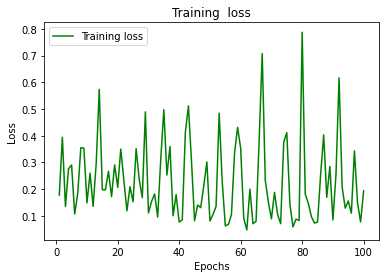

In [55]:
#evaluation and prediction
#Visualizing Training and Validation Loss
loss_train = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

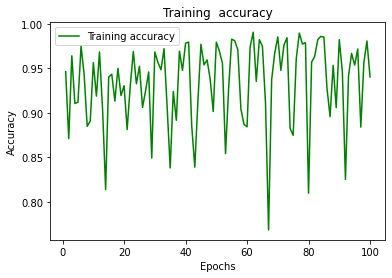

In [56]:
#Visualizing Training and Validation Accuracy
loss_train = history.history['accuracy']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
for i in range(200):
    print("actual",y_test[i],"predicted",y_test_pred[i])